In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_fake = pd.read_csv("Data/Fake.csv")

In [3]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [4]:
df_true = pd.read_csv("Data/True.csv")

In [5]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


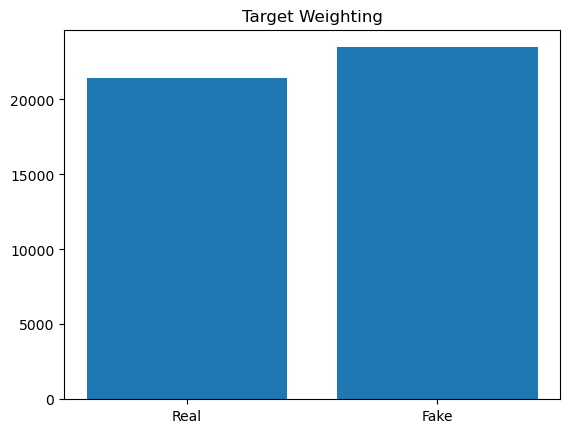

In [21]:
class_df = pd.DataFrame({"Real": [len(df_true)], "Fake": [len(df_fake)]}, index = ["Count"])
class_df

plt.title('Target Weighting')
plt.bar(class_df.columns,class_df.loc["Count"])
plt.show()

In [54]:
#Count of topics in each Data Frame
true_subject = pd.DataFrame(df_true["subject"].value_counts().reset_index())
true_subject.columns = ["Real Subjects", "Count of Each Subject"]
fake_subject = pd.DataFrame(df_fake["subject"].value_counts().reset_index())
fake_subject.columns = ["Fake Subjects", "Count of Each Subject"]
subject_counts_df = pd.concat([true_subject, fake_subject], axis = 1)

subject_counts_df

,Real Subjects,Count of Each Subject,Fake Subjects,Count of Each Subject
0,politicsNews,11272.0,News,9050
1,worldnews,10145.0,politics,6841
2,NaN,NaN,left-news,4459
3,NaN,NaN,Government News,1570
4,NaN,NaN,US_News,783
5,NaN,NaN,Middle-east,778


In [57]:
avg_fake_len = df_fake["text"].str.len().mean()
shortest_fake_len = df_fake["text"].str.len().min()
longest_fake_len = df_fake["text"].str.len().max()

avg_true_len = df_true["text"].str.len().mean()
shortest_true_len = df_true["text"].str.len().min()
longest_true_len = df_true["text"].str.len().max()

text_df = pd.DataFrame()
text_df["Average text length"] = [avg_true_len, avg_fake_len]
text_df["Shortest text length"] = [shortest_true_len, shortest_fake_len]
text_df["Longest text length"] = [longest_true_len, longest_fake_len]
text_df.index = ["Real","Fake"]
df

,Average text length,Shortest text length,Longest text length
Real,2383.278517,1,29781
Fake,2547.396235,1,51794


In [52]:
df_fake.query("subject == 'Government News'")

,title,text,subject,date,Target
15891,TOP FIVE Food Stamp Fraud Takedowns of 2017…Do...,After the Obama years of record food stamp us...,Government News,"Dec 30, 2017",0
15892,HOUSE INTEL Slaps Subpoenas on McCain Institut...,Please see our previous report below on the Mc...,Government News,"Dec 27, 2017",0
15893,PRICELESS! WATCH MSNBC HOST’S Shocked Response...,THIS IS PRICELESS! The video below shows just ...,Government News,"Dec 26, 2017",0
15894,CBS HIT JOB On New Tax Bill Backfires When Acc...,For weeks and weeks we ve heard the propaganda...,Government News,"Dec 22, 2017",0
15895,‘MORNING JOE’ PANEL Says Nikki Haley “Embarras...,It s really interesting to hear this panel go...,Government News,"Dec 22, 2017",0
...,...,...,...,...,...
17456,SHERIFF WON’T ENFORCE GUN CONTROL LAW HE CALLS...,The gun grabbers are at it again pushing for m...,Government News,"Apr 6, 2015",0
17457,ILLEGAL INVASION CONTINUES: NYC RAMPING UP TO ...,Insane! This really is the definition of insan...,Government News,"Apr 6, 2015",0
17458,NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...,Socialism doesn t work but I guess Venezuela d...,Government News,"Apr 6, 2015",0
17459,MarkLevin is Freaking Awesome: Obama negotiate...,Let s get real with some awesome truth from Ma...,Government News,"Apr 5, 2015",0


In [53]:
#Some of this news looks like it might be the category US_news and politics or Government in fake news 
df_true.query("subject == 'politicsNews'")

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
11267,Obama says willing to work with Republican Spe...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 13, 2016",1
11268,Obama says Islamic State fight far from 'World...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 13, 2016",1
11269,Chelsea Clinton stands her mother's ground in ...,"MANCHESTER, N.H. (Reuters) - U.S. Democratic p...",politicsNews,"January 13, 2016",1
11270,Obama jokes about a Trump State of the Union a...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 13, 2016",1


In [25]:
#Merging Datasets
df_true["Target"] = 1
df_fake["Target"] = 0
df_all = pd.concat([df_true, df_fake], ignore_index=True)
df_all


,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
